In [113]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import export_text


In [114]:
paths = ["prices_round_2_day_-1.csv", "prices_round_2_day_0.csv", "prices_round_2_day_1.csv"]
# initialize df
df = pd.DataFrame()
for i, path in enumerate(paths):
    # concat df
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])


In [115]:
df.head()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


In [116]:
x = df[['SUNLIGHT', 'HUMIDITY']].iloc[1:df.shape[0]].reset_index(drop=True)
y = df['ORCHIDS'].iloc[1:df.shape[0]].reset_index(drop=True)


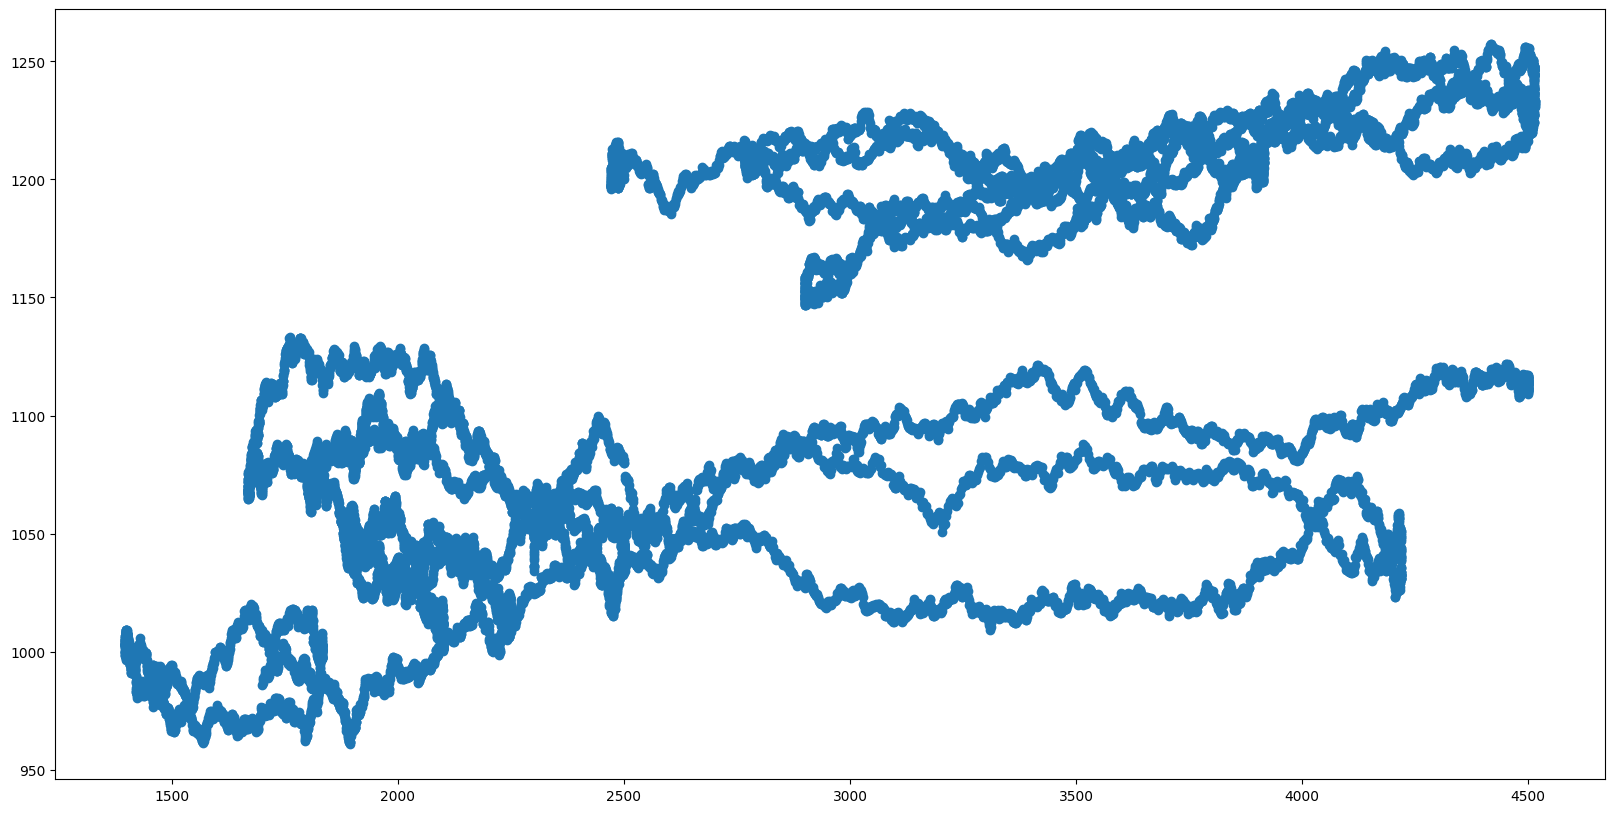

In [117]:
plt.figure(figsize=(20, 10))
plt.scatter(x['HUMIDITY'], y)


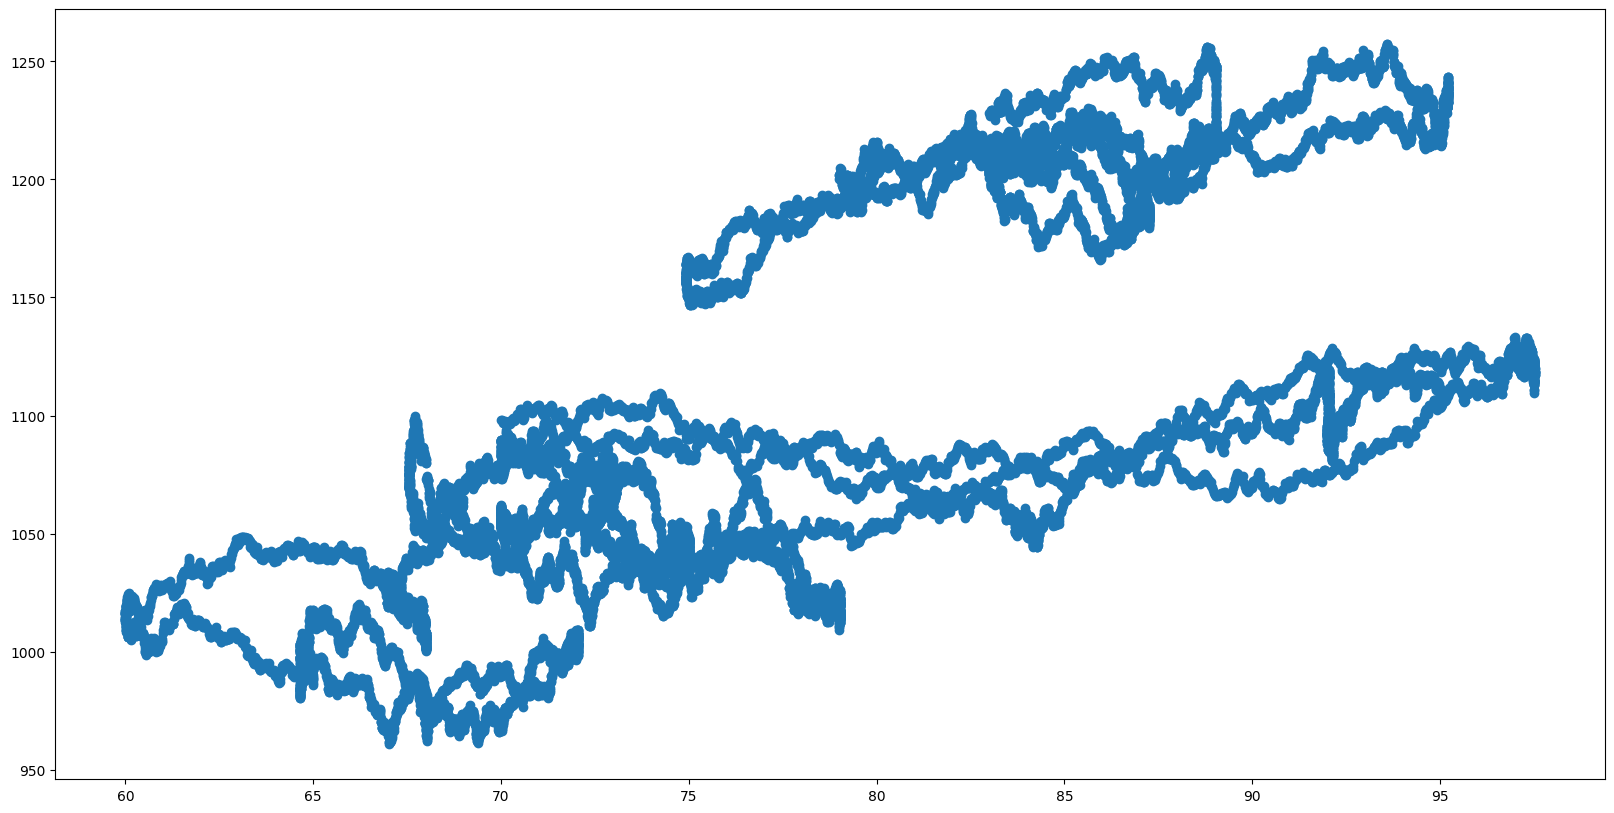

In [118]:
plt.figure(figsize=(20, 10))
plt.scatter(x['ORCHIDS'], y)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, shuffle=False)


In [120]:
reg_model = linear_model.LinearRegression()


In [121]:
reg_model = LinearRegression().fit(x_train, y_train)


In [122]:
print('Intercept: ', reg_model.intercept_)
list(zip(x, reg_model.coef_))


Intercept:  756.1375205980627


[('SUNLIGHT', 0.054945657417507135), ('HUMIDITY', 2.5863209214131837)]

In [123]:
y_pred= reg_model.predict(x_test)  
x_pred= reg_model.predict(x_train) 


In [124]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff


,Actual value,Predicted value
4000,1056.75,1071.313960
4001,1056.75,1071.297529
4002,1057.25,1071.281145
4003,1058.25,1071.264831
4004,1057.25,1071.248584
...,...,...
9996,1036.25,1063.385055
9997,1036.25,1063.427199
9998,1036.25,1063.469549
9999,1034.25,1063.512168


In [125]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(51.98882016522703, 70.8252498774397, -13.506438336099494)

In [126]:
random_forest_model = RandomForestRegressor(n_estimators=5, random_state=42)
random_forest_model.fit(x_train, y_train)

y_pred_forest = random_forest_model.predict(x_test)


In [127]:
forest_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_forest})
forest_model_diff


,Actual value,Predicted value
4000,1056.75,1040.85
4001,1056.75,1040.85
4002,1057.25,1040.85
4003,1058.25,1040.85
4004,1057.25,1040.85
...,...,...
9996,1036.25,1043.45
9997,1036.25,1043.45
9998,1036.25,1043.45
9999,1034.25,1043.45


In [128]:
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = mse_forest ** 0.5
r2_forest = r2_score(y_test, y_pred_forest)

print(mae_forest, rmse_forest, r2_forest)

tree_representation = export_text(random_forest_model.estimators_[0])
print(len(random_forest_model.estimators_))

79.99847525412432 103.27984277349736 -29.847196618232417
5
